In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df_may = pd.read_csv('data/filtered_stocks_11May.csv')
df_jan = pd.read_csv('data/filtered_stocks_23Jan.csv')
df_stock_outstanding = pd.read_csv('data/stock_descriptions_with_marketCap.csv')
df_may_merged = pd.merge(df_may, df_stock_outstanding, how='left', left_on='Ticker_Symbol', right_on='Symbol')
df_jan_merged = pd.merge(df_jan, df_stock_outstanding, how='left', left_on='Ticker_Symbol', right_on='Symbol')

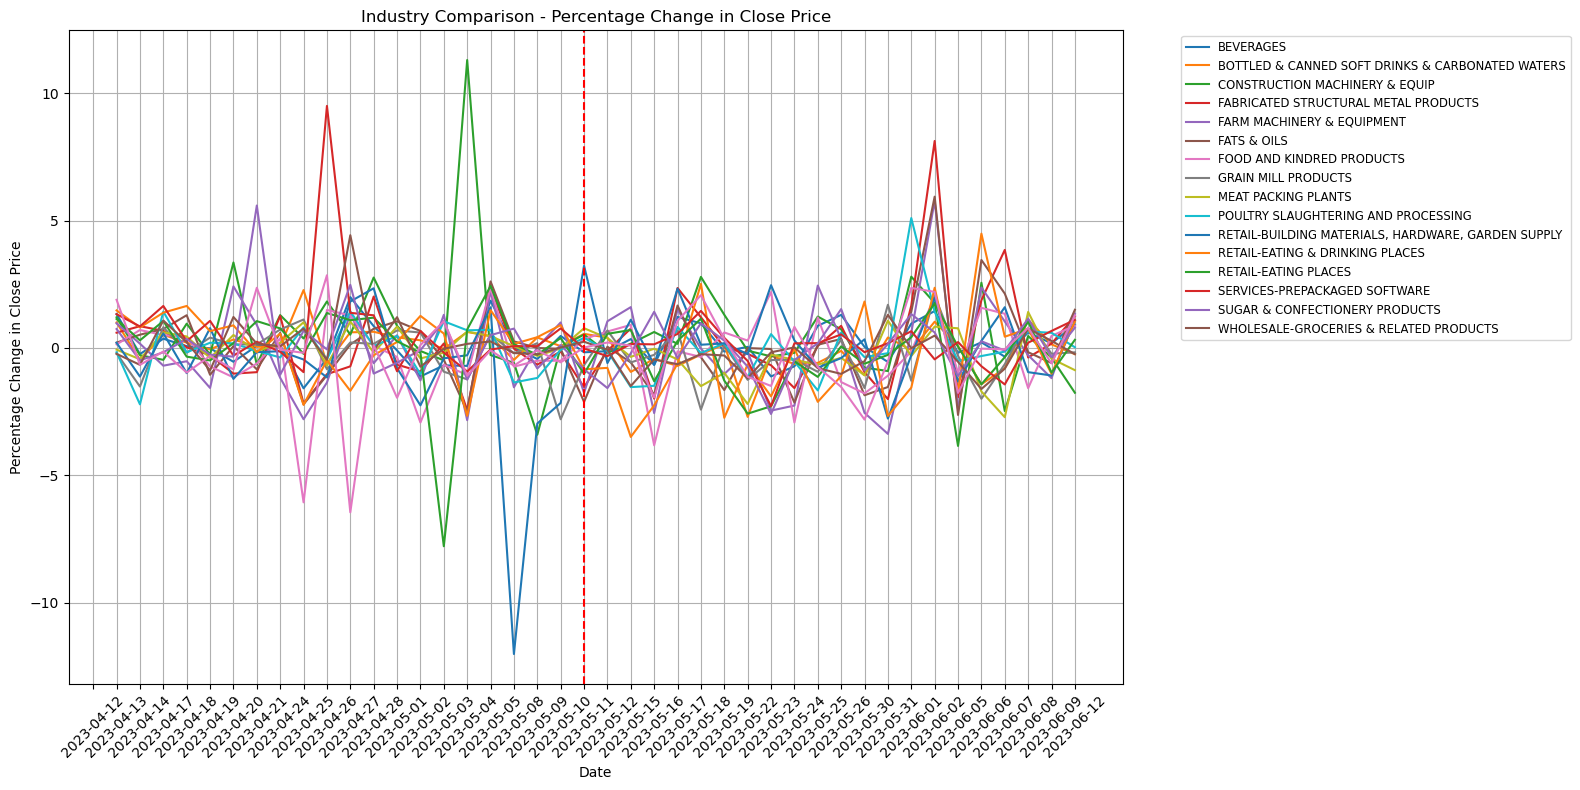

In [16]:
# Plot "Percentage Change in Close Price" against "Date-Time" for 2023 data set. 
data1_filtered = df_may_merged[df_may_merged['Ticker_Symbol'] != 'SPY']
industry_avg = data1_filtered.groupby(['Industry', 'Date-Time'])['Close'].mean().unstack(level=0)
industry_categories = industry_avg.columns.tolist()
spy_avg = df_may_merged[df_may_merged['Ticker_Symbol'] == 'SPY'].groupby('Date-Time')['Close'].mean()
event_date = '2023-05-11'
industry_avg_pct_change = industry_avg.pct_change() * 100
spy_avg_pct_change = spy_avg.pct_change() * 100
plt.figure(figsize=(16, 8))
plt.plot(spy_avg_pct_change.index, spy_avg_pct_change.values, label='SPY')
for industry in industry_avg_pct_change.columns:
    plt.plot(industry_avg_pct_change.index, industry_avg_pct_change[industry], label=industry)
plt.axvline(x=event_date, color='r', linestyle='--', label='Event Date')
plt.title('Industry Comparison - Percentage Change in Close Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change in Close Price')
plt.xticks(rotation=45)
plt.legend(labels=industry_categories, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

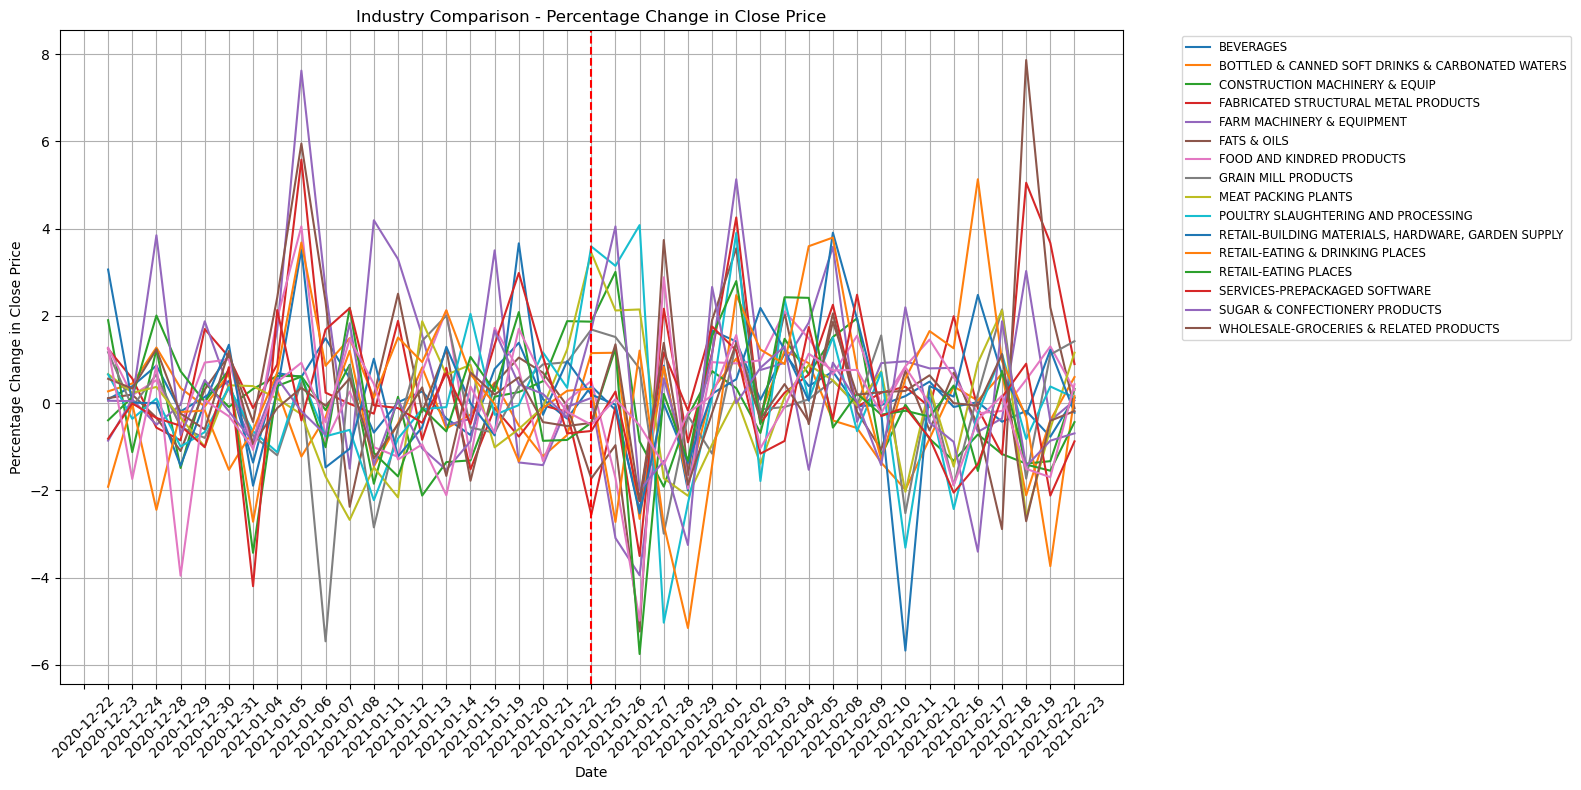

In [17]:
# Plot "Percentage Change in Close Price" against "Date-Time" for 2021 data set.
data2_filtered = df_jan_merged[df_jan_merged['Ticker_Symbol'] != 'SPY']
industry_avg = data2_filtered.groupby(['Industry', 'Date-Time'])['Close'].mean().unstack(level=0)
industry_categories = industry_avg.columns.tolist()
spy_avg = df_jan_merged[df_jan_merged['Ticker_Symbol'] == 'SPY'].groupby('Date-Time')['Close'].mean()
event_date = '2021-01-25'
industry_avg_pct_change = industry_avg.pct_change() * 100
spy_avg_pct_change = spy_avg.pct_change() * 100
plt.figure(figsize=(16, 8))
plt.plot(spy_avg_pct_change.index, spy_avg_pct_change.values, label='SPY')
for industry in industry_avg_pct_change.columns:
    plt.plot(industry_avg_pct_change.index, industry_avg_pct_change[industry], label=industry)
plt.axvline(x=event_date, color='r', linestyle='--', label='Event Date')
plt.title('Industry Comparison - Percentage Change in Close Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change in Close Price')
plt.xticks(rotation=45)
plt.legend(labels=industry_categories, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()